In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from glob import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import ptitprince as pt
import matplotlib.collections as clt


## SOURCE CONTROLLED ACCURACY AND REACTION TIMES FOR INFERENCE

## Load Data sheets

In [2]:
## INFERENCE!
src_exp_1 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/modified_mTurk_pavlovia_data/summary_data/srcAB3BC_inference.csv')
src_exp_2 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/summaryXYdata/srcAB3BC_inference.csv')
src_exp_3 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/HA_summary/srcAB3BC_inference.csv')
src_exp_4 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/SEQ_summary/srcAB3BC_inference.csv')

src_exp_1.columns = src_exp_1.columns.str.replace(" ", "_")
src_exp_2.columns = src_exp_2.columns.str.replace(" ", "_")
src_exp_3.columns = src_exp_3.columns.str.replace(" ", "_")
src_exp_4.columns = src_exp_4.columns.str.replace(" ", "_")

##Reaction Time!!
src_rt_exp_1 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/modified_mTurk_pavlovia_data/summary_data/srcAB3BC_rt.csv')
src_rt_exp_2 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/summaryXYdata/srcAB3BC_rt.csv')
src_rt_exp_3 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/HA_summary/srcAB3BC_rt.csv')
src_rt_exp_4 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/SEQ_summary/srcAB3BC_rt.csv')

src_rt_exp_1.columns = src_rt_exp_1.columns.str.replace(" ", "_")
src_rt_exp_2.columns = src_rt_exp_2.columns.str.replace(" ", "_")
src_rt_exp_3.columns = src_rt_exp_3.columns.str.replace(" ", "_")
src_rt_exp_4.columns = src_rt_exp_4.columns.str.replace(" ", "_")

In [3]:
val_exp_1 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/modified_mTurk_pavlovia_data/summary_data/overall_inference_valence.csv')
val_exp_2 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/summaryXYdata/overall_inference_valence.csv')
val_exp_3 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/HA_summary/overall_inference_valence.csv')
val_exp_4 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/SEQ_summary/overall_inference_valence.csv')

val_exp_1.columns = val_exp_1.columns.str.replace(" ", "_")
val_exp_2.columns = val_exp_2.columns.str.replace(" ", "_")
val_exp_3.columns = val_exp_3.columns.str.replace(" ", "_")
val_exp_4.columns = val_exp_4.columns.str.replace(" ", "_")

##Reaction Time!!
val_rt_exp_1 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/modified_mTurk_pavlovia_data/summary_data/overall_RT_valence.csv')
val_rt_exp_2 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/summaryXYdata/overall_RT_valence.csv')
val_rt_exp_3 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/HA_summary/overall_RT_valence.csv')
val_rt_exp_4 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/SEQ_summary/overall_RT_valence.csv')

val_rt_exp_1.columns = val_rt_exp_1.columns.str.replace(" ", "_")
val_rt_exp_2.columns = val_rt_exp_2.columns.str.replace(" ", "_")
val_rt_exp_3.columns = val_rt_exp_3.columns.str.replace(" ", "_")
val_rt_exp_4.columns = val_rt_exp_4.columns.str.replace(" ", "_")

In [4]:
exp_1 = pd.merge(val_exp_1, src_exp_1, on="participant")
rt_exp_1 = pd.merge(val_rt_exp_1, src_rt_exp_1, on="participant")

In [5]:
exp_2 = src_exp_2
exp_3 = src_exp_3
exp_4 = src_exp_4

In [6]:
stacked_exp1 = pd.melt(exp_1, id_vars=['participant'], value_vars=['Avg_BC', 'Avg_BC_emo', 'Avg_AC_y', 'Avg_AC_emo_y', 'Avg_ABfinal', 'Avg_ABfinal_emo', 'Avg_BCfinal', 'Avg_BCfinal_emo'], var_name='condition', value_name='Total_acc')
stacked_exp2 = pd.melt(exp_2, id_vars=['participant'], value_vars=['Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='Total_acc')
stacked_exp3 = pd.melt(exp_3, id_vars=['participant'], value_vars=['Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='Total_acc')
stacked_exp4 = pd.melt(exp_4, id_vars=['participant'], value_vars=['Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='Total_acc')

stacked_exp1 ['ExpNum'] = '1'
stacked_exp2 ['ExpNum'] = '2'
stacked_exp3 ['ExpNum'] = '3'
stacked_exp4 ['ExpNum'] = '4'

mrg_experiments= [stacked_exp1, stacked_exp2, stacked_exp3, stacked_exp4]
experiments = pd.concat(mrg_experiments)
experiments

# rt_stacked_exp1 = pd.melt(rt_exp_1, id_vars=['participant'], value_vars=['Avg_BC', 'Avg_BC_emo', 'Avg_AC_y', 'Avg_AC_emo_y', 'Avg_ABfinal', 'Avg_ABfinal_emo', 'Avg_BCfinal', 'Avg_BCfinal_emo'], var_name='condition', value_name='RT')
# rt_stacked_exp2 = pd.melt(rt_exp_2, id_vars=['participant'], value_vars=['Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='RT')
# rt_stacked_exp3 = pd.melt(rt_exp_3, id_vars=['participant'], value_vars=['Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='RT')
# rt_stacked_exp4 = pd.melt(rt_exp_4, id_vars=['participant'], value_vars=['Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='RT')

# rt_stacked_exp1 ['ExpNum'] = '1'
# rt_stacked_exp2 ['ExpNum'] = '2'
# rt_stacked_exp3 ['ExpNum'] = '3'
# rt_stacked_exp4 ['ExpNum'] = '4'
# rt_mrg_experiments= [rt_stacked_exp1, rt_stacked_exp2, rt_stacked_exp3, rt_stacked_exp4]
# rt_experiments = pd.concat(rt_mrg_experiments)
# rt_experiments

,participant,condition,Total_acc,ExpNum
0,A0017268R9SKD8U2Y3F,Avg_BC,0.833333,1
1,A12HWPFXQPITHD,Avg_BC,0.666667,1
2,A14WLAP6TCEKO0,Avg_BC,0.277778,1
3,A16G6PPH1INQL8,Avg_BC,0.541667,1
4,A1C5SQZ045W0L5,Avg_BC,0.782609,1
...,...,...,...,...
247,A2V8CV9H3U2M5P,Avg_AC_emo,0.500000,4
248,A35KSAHOAK9CAI,Avg_AC_emo,0.166667,4
249,A4158R4Y06ZB4,Avg_AC_emo,0.750000,4
250,ATOV0H5KQHI29,Avg_AC_emo,0.461538,4


## MAIN Data figure: BCXY and AC

In [15]:
red = '#FFB6C1' #muted green (xkcd)
blue = '#40E0D0' #iris (xkcd)

#fig, ax = plt.subplots(figsize=(10, 10))
####FOR BAR GRAPHS####

experiments.loc[experiments['condition'] == 'Avg_AB3', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_BC', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_XY', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_AC', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_AC_y', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_ABfinal', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_BCfinal', 'valence'] = 'c-neutral'

experiments.loc[experiments['condition'] == 'Avg_AB3_emo', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_BC_emo', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_XY_emo', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_AC_emo', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_AC_emo_y', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_ABfinal_emo', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_BCfinal_emo', 'valence'] = 'fearful'


experiments.loc[experiments['condition'] == 'Avg_AB3', 'Test'] = '1-Initial learning (AB)'
experiments.loc[experiments['condition'] == 'Avg_BC', 'Test'] = '2-Overlapping pairs (BC)'
experiments.loc[experiments['condition'] == 'Avg_XY', 'Test'] = '3-Non-overlapping pairs (XY)'
experiments.loc[experiments['condition'] == 'Avg_AC', 'Test'] = '4-Inference (AC)'
experiments.loc[experiments['condition'] == 'Avg_AC_y', 'Test'] = '4-Inference (AC)'
experiments.loc[experiments['condition'] == 'Avg_ABfinal', 'Test'] = 'Final AB test'
experiments.loc[experiments['condition'] == 'Avg_BCfinal', 'Test'] = 'Final BC test'

experiments.loc[experiments['condition'] == 'Avg_AB3_emo', 'Test'] = '1-Initial learning (AB)'
experiments.loc[experiments['condition'] == 'Avg_BC_emo', 'Test'] = '2-Overlapping pairs (BC)'
experiments.loc[experiments['condition'] == 'Avg_XY_emo', 'Test'] = '3-Non-overlapping pairs (XY)'
experiments.loc[experiments['condition'] == 'Avg_AC_emo', 'Test'] = '4-Inference (AC)'
experiments.loc[experiments['condition'] == 'Avg_AC_emo_y', 'Test'] = '4-Inference (AC)'
experiments.loc[experiments['condition'] == 'Avg_ABfinal_emo', 'Test'] = 'Final AB test'
experiments.loc[experiments['condition'] == 'Avg_BCfinal_emo', 'Test'] = 'Final BC test'

exp1 = experiments.loc[experiments['ExpNum'] == '1']
exp2 = experiments.loc[experiments['ExpNum'] == '2']
exp3 = experiments.loc[experiments['ExpNum'] == '3']
exp4 = experiments.loc[experiments['ExpNum'] == '4']

AB3 = experiments.loc[experiments['Test'] == '1-Initial learning (AB)']
BC = experiments.loc[experiments['Test'] == '2-Overlapping pairs (BC)']
XY = experiments.loc[experiments['Test'] == '3-Non-overlapping pairs (XY)']
AC = experiments.loc[experiments['Test'] == '4-Inference (AC)']
FinalAB = experiments.loc[experiments['Test'] == 'Final AB test']
FinalBC = experiments.loc[experiments['Test'] == 'Final BC test']



In [16]:

### BC
BCexp1_neu = exp1.loc[exp1['condition'] == 'Avg_BC']
BCexp2_neu = exp2.loc[exp2['condition'] == 'Avg_BC']
BCexp3_neu = exp3.loc[exp3['condition'] == 'Avg_BC']
BCexp4_neu = exp4.loc[exp4['condition'] == 'Avg_BC']

BCexp1_emo = exp1.loc[exp1['condition'] == 'Avg_BC_emo']
BCexp2_emo = exp2.loc[exp2['condition'] == 'Avg_BC_emo']
BCexp3_emo = exp3.loc[exp3['condition'] == 'Avg_BC_emo']
BCexp4_emo = exp4.loc[exp4['condition'] == 'Avg_BC_emo']

## XY
XYexp2_neu = exp2.loc[exp2['condition'] == 'Avg_XY']
XYexp3_neu = exp3.loc[exp3['condition'] == 'Avg_XY']
XYexp4_neu = exp4.loc[exp4['condition'] == 'Avg_XY']

XYexp2_emo = exp2.loc[exp2['condition'] == 'Avg_XY_emo']
XYexp3_emo = exp3.loc[exp3['condition'] == 'Avg_XY_emo']
XYexp4_emo = exp4.loc[exp4['condition'] == 'Avg_XY_emo']

## AC
ACexp1_neu = exp1.loc[exp1['condition'] == 'Avg_AC_y']
ACexp2_neu = exp2.loc[exp2['condition'] == 'Avg_AC']
ACexp3_neu = exp3.loc[exp3['condition'] == 'Avg_AC']
ACexp4_neu = exp4.loc[exp4['condition'] == 'Avg_AC']

ACexp1_emo = exp1.loc[exp1['condition'] == 'Avg_AC_emo_y']
ACexp2_emo = exp2.loc[exp2['condition'] == 'Avg_AC_emo']
ACexp3_emo = exp3.loc[exp3['condition'] == 'Avg_AC_emo']
ACexp4_emo = exp4.loc[exp4['condition'] == 'Avg_AC_emo']

exp1BC = exp1.loc[exp1['Test'] == '2-Overlapping pairs (BC)']
exp1AC = exp1.loc[exp1['Test'] == '4-Inference (AC)']
mainexp1 = [exp1BC, exp1AC]
mainexp1 = pd.concat(mainexp1)

exp2BC = exp2.loc[exp2['Test'] == '2-Overlapping pairs (BC)']
exp2XY = exp2.loc[exp2['Test'] == '3-Non-overlapping pairs (XY)']
exp2AC = exp2.loc[exp2['Test'] == '4-Inference (AC)']
mainexp2 = [exp2BC, exp2XY, exp2AC]
mainexp2 = pd.concat(mainexp2)

exp3BC = exp3.loc[exp3['Test'] == '2-Overlapping pairs (BC)']
exp3XY = exp3.loc[exp3['Test'] == '3-Non-overlapping pairs (XY)']
exp3AC = exp3.loc[exp3['Test'] == '4-Inference (AC)']
mainexp3 = [exp3BC, exp3XY, exp3AC]
mainexp3 = pd.concat(mainexp3)

exp4BC = exp4.loc[exp4['Test'] == '2-Overlapping pairs (BC)']
exp4XY = exp4.loc[exp4['Test'] == '3-Non-overlapping pairs (XY)']
exp4AC = exp4.loc[exp4['Test'] == '4-Inference (AC)']
mainexp4 = [exp4BC, exp4XY, exp4AC]
mainexp4 = pd.concat(mainexp4)


neuBC_mean1 = np.mean(BCexp1_neu['Total_acc'])
emoBC_mean1 = np.mean(BCexp1_emo['Total_acc'])
neuBC_mean2 = np.mean(BCexp2_neu['Total_acc'])
emoBC_mean2 = np.mean(BCexp2_emo['Total_acc'])
neuBC_mean3 = np.mean(BCexp3_neu['Total_acc'])
emoBC_mean3 = np.mean(BCexp3_emo['Total_acc'])
neuBC_mean4 = np.mean(BCexp4_neu['Total_acc'])
emoBC_mean4 = np.mean(BCexp4_emo['Total_acc'])

neuBC_std1 = stats.sem(BCexp1_neu['Total_acc'])
emoBC_std1 = stats.sem(BCexp1_emo['Total_acc'])
neuBC_std2 = stats.sem(BCexp2_neu['Total_acc'])
emoBC_std2 = stats.sem(BCexp2_emo['Total_acc'])
neuBC_std3 = stats.sem(BCexp3_neu['Total_acc'])
emoBC_std3 = stats.sem(BCexp3_emo['Total_acc'])
neuBC_std4 = stats.sem(BCexp4_neu['Total_acc'])
emoBC_std4 = stats.sem(BCexp4_emo['Total_acc'])

neuXY_mean2 = np.mean(XYexp2_neu['Total_acc'])
emoXY_mean2 = np.mean(XYexp2_emo['Total_acc'])
neuXY_mean3 = np.mean(XYexp3_neu['Total_acc'])
emoXY_mean3 = np.mean(XYexp3_emo['Total_acc'])
neuXY_mean4 = np.mean(XYexp4_neu['Total_acc'])
emoXY_mean4 = np.mean(XYexp4_emo['Total_acc'])

neuXY_std2 = stats.sem(XYexp2_neu['Total_acc'])
emoXY_std2 = stats.sem(XYexp2_emo['Total_acc'])
neuXY_std3 = stats.sem(XYexp3_neu['Total_acc'])
emoXY_std3 = stats.sem(XYexp3_emo['Total_acc'])
neuXY_std4 = stats.sem(XYexp4_neu['Total_acc'])
emoXY_std4 = stats.sem(XYexp4_emo['Total_acc'])

neuAC_mean1 = np.mean(ACexp1_neu['Total_acc'])
emoAC_mean1 = np.mean(ACexp1_emo['Total_acc'])
neuAC_mean2 = np.mean(ACexp2_neu['Total_acc'])
emoAC_mean2 = np.mean(ACexp2_emo['Total_acc'])
neuAC_mean3 = np.mean(ACexp3_neu['Total_acc'])
emoAC_mean3 = np.mean(ACexp3_emo['Total_acc'])
neuAC_mean4 = np.mean(ACexp4_neu['Total_acc'])
emoAC_mean4 = np.mean(ACexp4_emo['Total_acc'])

neuAC_std1 = stats.sem(ACexp1_neu['Total_acc'])
emoAC_std1 = stats.sem(ACexp1_emo['Total_acc'])
neuAC_std2 = stats.sem(ACexp2_neu['Total_acc'])
emoAC_std2 = stats.sem(ACexp2_emo['Total_acc'])
neuAC_std3 = stats.sem(ACexp3_neu['Total_acc'])
emoAC_std3 = stats.sem(ACexp3_emo['Total_acc'])
neuAC_std4 = stats.sem(ACexp4_neu['Total_acc'])
emoAC_std4 = stats.sem(ACexp4_emo['Total_acc'])

dummy_mean1 = 0.2
dummy_sems1 = 0

neutral_means1 = [neuBC_mean1, neuAC_mean1, dummy_mean1]
neutral_sems1 = [neuBC_std1, neuAC_std1, dummy_sems1]
emotional_means1 = [emoBC_mean1, emoAC_mean1, dummy_mean1]
emotional_sems1 = [emoBC_std1, emoAC_std1,dummy_sems1]

neutral_means2 = [neuBC_mean2, neuXY_mean2, neuAC_mean2]
neutral_sems2= [neuBC_std2, neuXY_std2, neuAC_std2]
emotional_means2 = [emoBC_mean2, emoXY_mean2, emoAC_mean2]
emotional_sems2= [emoBC_std2, emoXY_std2, emoAC_std2]

neutral_means3 = [neuBC_mean3, neuXY_mean3, neuAC_mean3]
neutral_sems3= [neuBC_std3, neuXY_std3, neuAC_std3]
emotional_means3 = [emoBC_mean3, emoXY_mean3, emoAC_mean3]
emotional_sems3 = [emoBC_std3, emoXY_std3, emoAC_std3]

neutral_means4= [neuBC_mean4, neuXY_mean4, neuAC_mean4]
neutral_sems4= [neuBC_std4, neuXY_std4, neuAC_std4]
emotional_means4 = [emoBC_mean4, emoXY_mean4, emoAC_mean4]
emotional_sems4 = [emoBC_std4, emoXY_std4, emoAC_std4]


In [17]:
neutral_sems1

[0.03486565125390677, 0.03727820372996694, 0]

### Line/ Bar Graphs

In [18]:
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
#plt.rc('font', serif='Helvetica Neue') 
plt.rc('font', serif='Helvetica Neue')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['svg.fonttype']= 'none'
plt.rcParams.update({'font.size': 28})
plt.rc('xtick',labelsize=28)
plt.rc('ytick',labelsize=20)

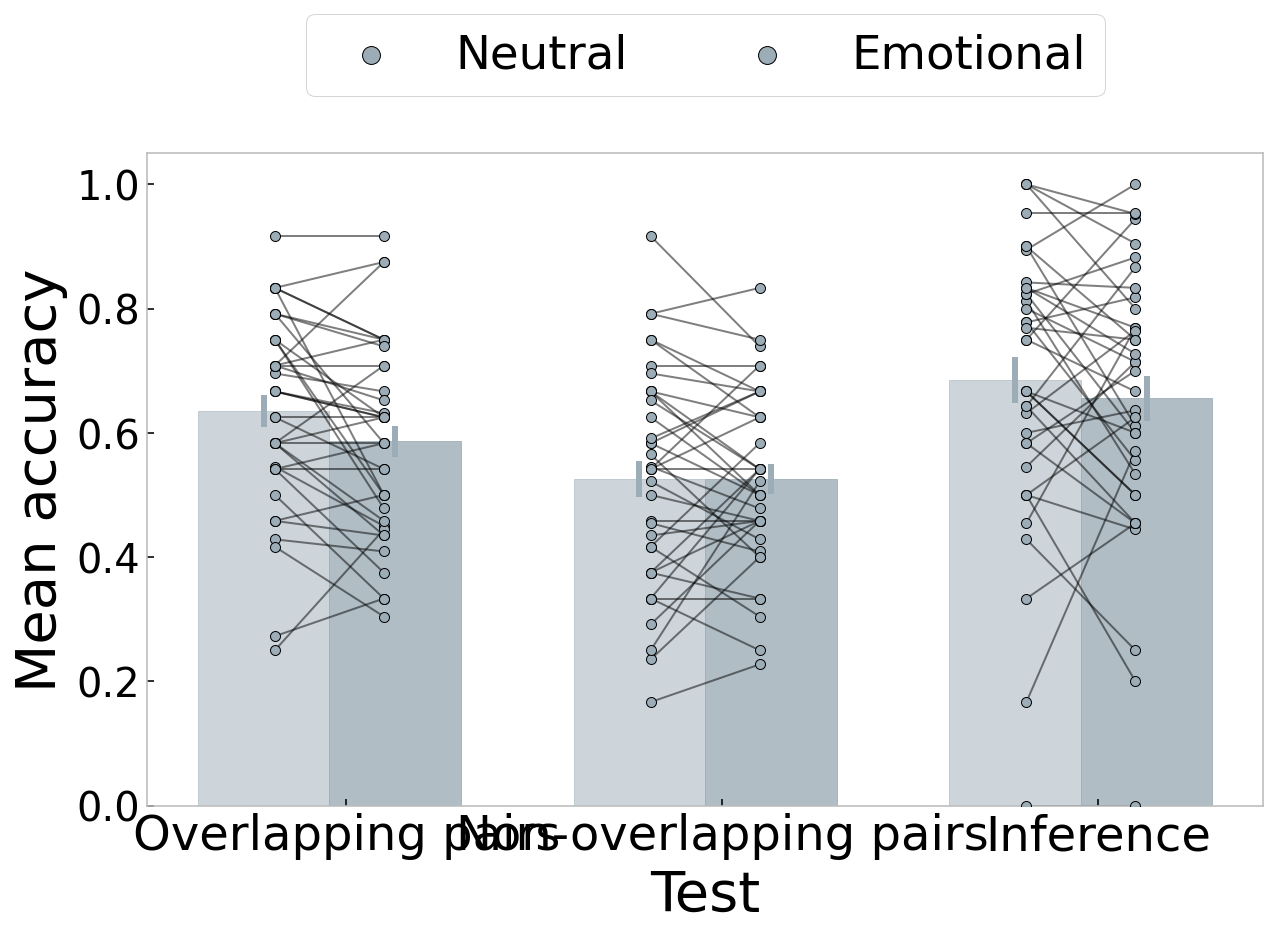

In [19]:
#UT branded colors 
#red = '#c51b8a' #yellow 
#blue = '#fa9fb5' #neutral
white = '#ffffff'
black = '#333f48'
ut_yellow = '#ffd600' #neutral
ut_orange = '#f8971f' #emotional
ut_blue= '#00a9b7' #neutral
ut_dblue= '#005f86' #emotional
ut_grey = '#9cadb7'

fig, ax = plt.subplots(figsize=(10, 6))

##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(3) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, neutral_means3, width,
    color= ut_grey,
    #hatch = '.',
    edgecolor= ut_grey,
    alpha = 0.5,
    yerr=neutral_sems3,
    error_kw=dict(elinewidth=3,ecolor= ut_grey))
ax.bar(ind+width, emotional_means3, width,
    color= ut_grey,
    #hatch = '.',
    edgecolor= ut_grey,
    alpha = 0.8,
    yerr=emotional_sems3,
    error_kw=dict(elinewidth=3,ecolor= ut_grey))

##################
#SCATTERPLOT GRAPHS
##################
exps2 = []
#i = 1.0
i = 0.2

for one_exp, subdf in mainexp3.groupby('Test'):
    exps2.append(one_exp)
     # Get the values for same_context and bound_context bias in each valence condition
    h = subdf.query('valence == "c-neutral"')['Total_acc'].values
    d = subdf.query('valence == "fearful"')['Total_acc'].values
     # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2
    line_color = ["black"]
    line_colors = np.repeat(line_color, len(d))
    alphas = [0.5]*len(line_colors)

     # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1 + 0.03, x2 - 0.08], [hi, di], c=ci, alpha=ai, linewidth = 1)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
    ax.scatter(len(h)*[x1+0.03], h, c=ut_grey, edgecolors= "black",
    s=25, lw=0.5, label='Neutral', zorder=10)
    ax.scatter(len(d)*[x2-0.08], d, c=ut_grey, edgecolors= "black",
    s=25, lw=0.5, label='Emotional', zorder=10)
 # Update x-axis
    i += 1

# Fix the axes and labels 
lbls = ['Overlapping pairs', 'Non-overlapping pairs', 'Inference'] #adjust for exp1, insert 'Non-overlapping pairs (XY)'
ax.set_xticks([0.22, 1.22, 2.22])
_ = ax.set_xticklabels(lbls, fontsize='24')
# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],
                fontsize='small',
                loc='upper center',
                bbox_to_anchor=(0.5, 1.25),
                ncol=2,
                scatterpoints=1)
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
ax.set_xlabel('Test', fontsize = 28)
ax.set_ylabel('Mean accuracy', fontsize =28)

ax.patch.set_edgecolor('white')  

ax.patch.set_linewidth('0')

#plt.savefig('exp4_XY.pdf')

## AB3 Learning curve

In [20]:
ABstacked_exp1 = pd.melt(val_exp_1, id_vars=['participant'], value_vars=['Avg_AB1', 'Avg_AB2', 'Avg_AB3', 'Avg_AB1_emo', 'Avg_AB2_emo', 'Avg_AB3_emo' ], var_name='condition', value_name='Total_acc')
ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB1', 'Test'] = 'AB1'
ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB2', 'Test'] = 'AB2'
ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB3', 'Test'] = 'AB3'

ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB1_emo', 'Test'] = 'AB1'
ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB2_emo', 'Test'] = 'AB2'
ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB3_emo', 'Test'] = 'AB3'

ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB1', 'valence'] = 'c-neutral'
ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB2', 'valence'] = 'c-neutral'
ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB3', 'valence'] = 'c-neutral'

ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB1_emo', 'valence'] = 'fearful'
ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB2_emo', 'valence'] = 'fearful'
ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB3_emo', 'valence'] = 'fearful'

AB1 = ABstacked_exp1.loc[ABstacked_exp1['Test'] == 'AB1']
AB2 = ABstacked_exp1.loc[ABstacked_exp1['Test'] == 'AB2']
AB3 = ABstacked_exp1.loc[ABstacked_exp1['Test'] == 'AB3']

neuAB1 = AB1.loc[AB1['valence'] == 'c-neutral']
neuAB2 = AB2.loc[AB2['valence'] == 'c-neutral']
neuAB3 = AB3.loc[AB3['valence'] == 'c-neutral']

emoAB1 = AB1.loc[AB1['valence'] == 'fearful']
emoAB2 = AB2.loc[AB2['valence'] == 'fearful']
emoAB3 = AB3.loc[AB3['valence'] == 'fearful']

neuAB1_mean = np.mean(neuAB1['Total_acc'])
neuAB1_std = stats.sem(neuAB1['Total_acc'])
emoAB1_mean = np.mean(emoAB1['Total_acc'])
emoAB1_std = stats.sem(emoAB1['Total_acc'])

neuAB2_mean = np.mean(neuAB2['Total_acc'])
neuAB2_std = stats.sem(neuAB2['Total_acc'])
emoAB2_mean = np.mean(emoAB2['Total_acc'])
emoAB2_std = stats.sem(emoAB2['Total_acc'])

neuAB3_mean = np.mean(neuAB3['Total_acc'])
neuAB3_std = stats.sem(neuAB3['Total_acc'])
emoAB3_mean = np.mean(emoAB3['Total_acc'])
emoAB3_std = stats.sem(emoAB3['Total_acc'])

neutralAB_means = [neuAB1_mean, neuAB2_mean, neuAB3_mean]
neutralAB_sems = [neuAB1_std, neuAB2_std, neuAB3_std]
emotionalAB_means = [emoAB1_mean, emoAB2_mean, emoAB3_mean]
emotionalAB_sems = [emoAB1_std, emoAB2_std, emoAB3_std]


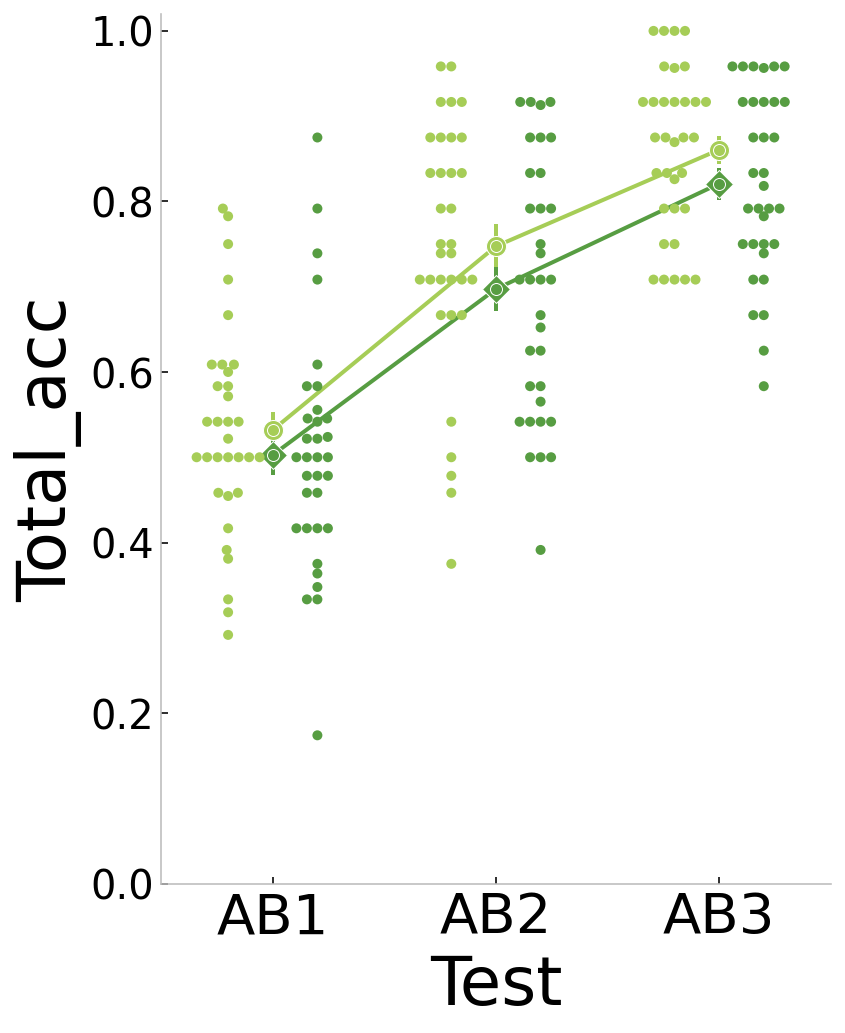

In [21]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

red = '#c51b8a' #yellow 
blue = '#fa9fb5' #neutral

lightg= '#a6cd57'#'#a1d99b'
darkg= '#579d42'#'#31a354'

colors = [lightg, darkg]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(6, 8))

g = sns.swarmplot(x="Test", y="Total_acc", hue="valence", data=ABstacked_exp1, palette = customPalette, dodge=True)
#plot.get_legend().set_visible(False)
g.legend_.remove()
sns.despine()
ABstacked_exp1.describe()
utneu = '#f8971f'
utemo = '#bf5700'
Tests = ['AB1', 'AB2', 'AB3']
ABmeans_df = pd.DataFrame({
    'Tests': Tests, 
    'Neutral Means': neutralAB_means,
    'Emotional Means': emotionalAB_means})
plt.plot('Tests', 'Neutral Means', data=ABmeans_df, linestyle='-', linewidth = 2,  marker='o', markersize = 10, color = lightg)
plt.errorbar(Tests, neutralAB_means, yerr=neutralAB_sems, fmt="o", color = lightg)
plt.plot('Tests', 'Emotional Means', data=ABmeans_df, linestyle='-', linewidth = 2, marker='D', markersize = 10, color = darkg)
plt.errorbar(Tests, emotionalAB_means, yerr=emotionalAB_sems, fmt="o", color = darkg)
plt.ylim (0,1.02)
#plt.ylabel('Mean Accuracy', fontsize=28)
#plt.savefig('exp3_AB.svg')
plt.show()

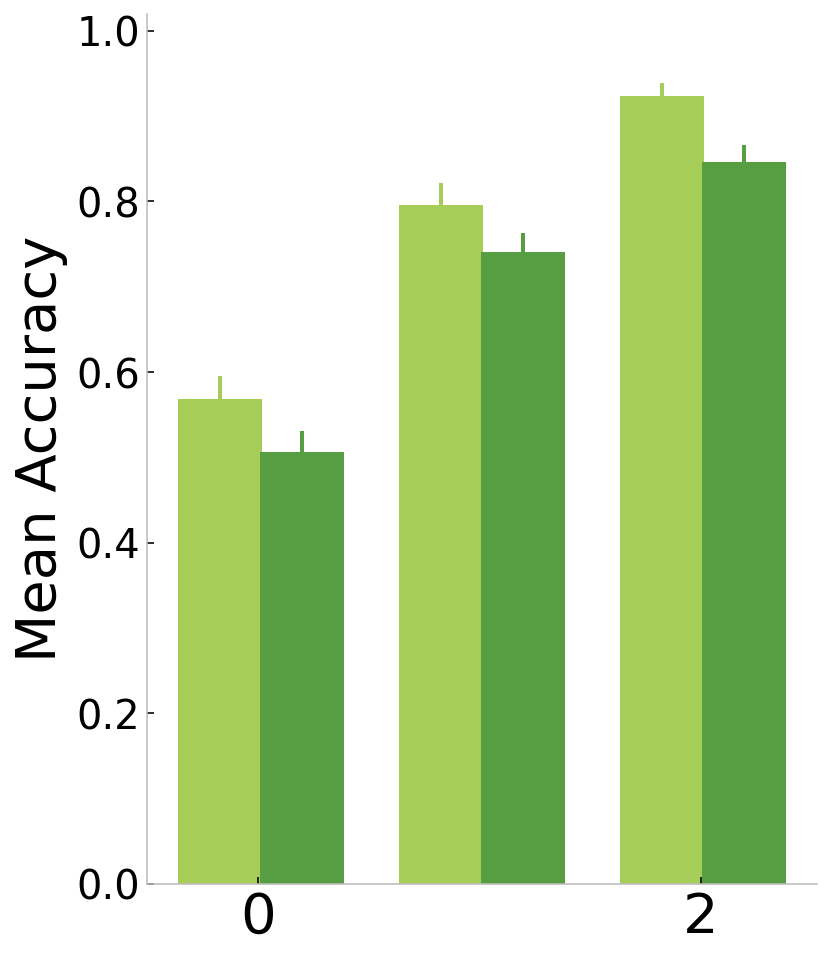

In [46]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

red = '#c51b8a' #yellow 
blue = '#fa9fb5' #neutral

lightg= '#a6cd57'#'#a1d99b'
darkg= '#579d42'#'#31a354'

colors = [lightg, darkg]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(6, 8))
#g = sns.scatterplot(x="Test", y="Total_acc", hue="valence", data=ABstacked_exp1, palette = customPalette, s = 45, edgecolor = 'black')
#plot.get_legend().set_visible(False)
#g.legend_.remove()
sns.despine()
ABstacked_exp1.describe()
utneu = '#f8971f'
utemo = '#bf5700'
Tests = ['AB1', 'AB2', 'AB3']
ABmeans_df = pd.DataFrame({
    'Tests': Tests, 
    'Neutral Means': neutralAB_means,
    'Emotional Means': emotionalAB_means})
#fig, ax = plt.subplots(figsize=(10, 6))
##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(3) # the x locations for the groups
#wid= 0.35/2 # the width of the bars
plt.bar(ind - 0.175, 'Neutral Means', data=ABmeans_df, color = lightg, width = 0.38, yerr = neutralAB_sems, ecolor = lightg, error_kw=dict(lw= 2))
plt.bar(ind + 0.197, 'Emotional Means', data=ABmeans_df, color = darkg, width = 0.38, yerr = emotionalAB_sems, ecolor = darkg, error_kw = dict(lw = 2))
plt.ylim (0,1.02)
plt.ylabel('Mean Accuracy', fontsize=28)
#plt.savefig('exp3_AB.svg')
plt.savefig('exp3_AB.pdf')
plt.show()

In [ ]:
ABmeans_df

In [ ]:
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rc('font', serif='Helvetica Neue') 
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['svg.fonttype']= 'none'
plt.rcParams.update({'font.size': 28})
plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24)

In [ ]:
def print_text(text):
    fig, ax = plt.subplots(figsize=(6, 1), facecolor="#eefade")
    ax.text(0.5, 0.5, text, ha='center', va='center', size=40)
    ax.axis("off")
    plt.show()

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Helvetica Neue"]
print_text("Hello World! 04")